In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
import sys

In [3]:
data = pd.read_csv('Obesity Prediction.csv')

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Step 3: Explore data (optional)
print("Columns:", data.columns)
print("Sample data:\n", data.head())


Columns: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')
Sample data:
    Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently         

In [6]:
target_col = 'Obesity'  # change this to the actual label/target column name in your file
X = data.drop(columns=[target_col])
y = data[target_col]

In [7]:
# Step 5: Encode categorical variables (label encoding or one-hot)
X = pd.get_dummies(X)  # one-hot encoding for categorical features


In [8]:
# Encode target if it's categorical (Yes/No or categories)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


In [9]:
# Step 6: Scale features (optional but recommended for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Step 8: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Step 9: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9314420803782506
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.82      0.87      0.84        62
           2       0.99      0.91      0.95        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.86      0.86        56
           6       0.92      0.94      0.93        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



Accuracy: 0.9314420803782506
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.82      0.87      0.84        62
     Obesity_Type_I       0.99      0.91      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.86      0.86      0.86        56
Overweight_Level_II       0.92      0.94      0.93        50

           accuracy                           0.93       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.93      0.93      0.93       423



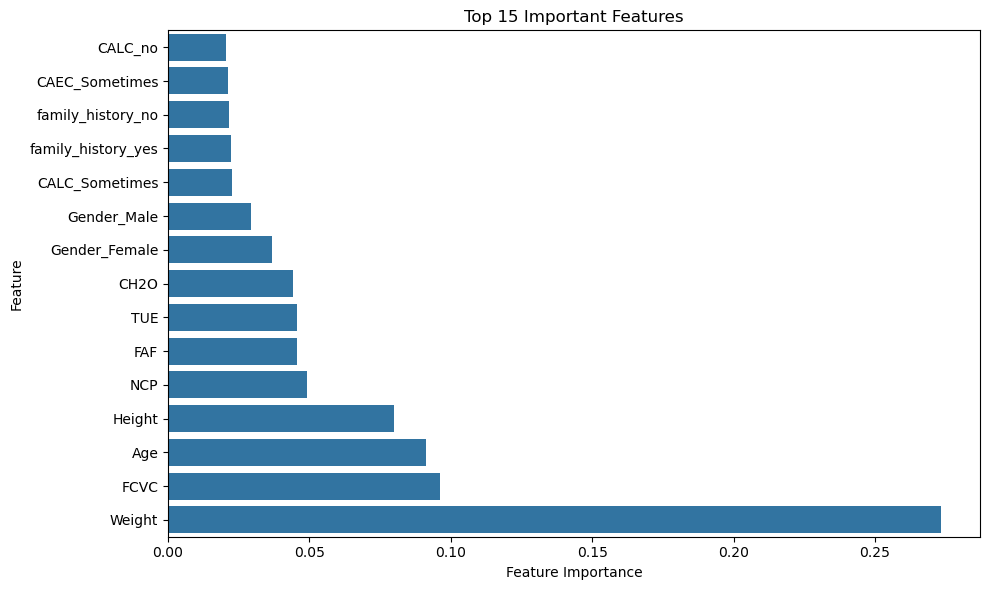

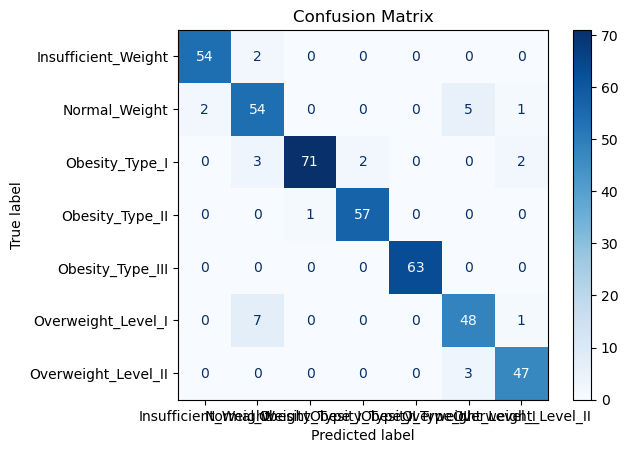

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load data
data = pd.read_csv("Obesity prediction.csv")

# Preprocessing
X = data.drop(columns=['Obesity'])
y = data['Obesity']
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Plot top 15 important features
importances = model.feature_importances_
feature_names = X_encoded.columns
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

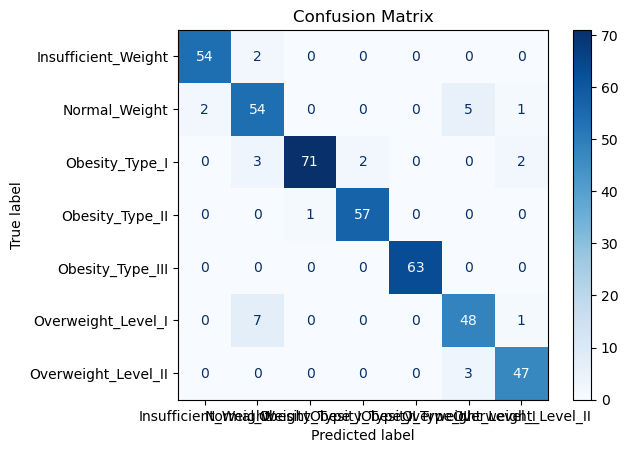

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [15]:
import joblib

# Save the trained model
joblib.dump(model, 'obesity_prediction_model.pkl')

# Also save the scaler and label encoder if you'll need them for predictions
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']

In [16]:
# Load the model
loaded_model = joblib.load('obesity_prediction_model.pkl')

# Load scaler and label encoder
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')

# Example: make predictions
# new_data = pd.DataFrame(...)  # your new data
# new_data_encoded = pd.get_dummies(new_data)
# new_data_scaled = loaded_scaler.transform(new_data_encoded)
# predictions = loaded_model.predict(new_data_scaled)
# predicted_classes = loaded_label_encoder.inverse_transform(predictions)


In [17]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the data
data = pd.read_csv('Obesity prediction.csv')

# Split features and target
X = data.drop(columns=['Obesity'])
y = data['Obesity']

# Encode categorical features and target
X_encoded = pd.get_dummies(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Save the model
with open('Obesity_Prediction_model.sav', 'wb') as file:
    pickle.dump(model, file)

# ✅ Save the scaler
with open('scaler.sav', 'wb') as file:
    pickle.dump(scaler, file)

# ✅ Save the label encoder
with open('label_encoder.sav', 'wb') as file:
    pickle.dump(label_encoder, file)

print("Model, scaler, and label encoder saved successfully.")


Model, scaler, and label encoder saved successfully.


In [36]:
import joblib

# Save the trained model
joblib.dump(model, 'obesity_prediction_model.pkl')

# Also save the scaler and label encoder if you'll need them for predictions
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [40]:
encoder = {
    'Gender': LabelEncoder().fit(df['Gender']),
    ...
}
joblib.dump(encoder, 'label_encoder.pkl')

SyntaxError: ':' expected after dictionary key (3832393898.py, line 3)